In [32]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# from osgeo import gdal
import seaborn as sns
import warnings



### To extract paramteres required from metadata of NEON data

In [33]:

### add your .h5 files in NIWO_neon_image and extract parameters from below function
def open_neon(NIWO_neon_image, no_data=-9999):
    """ 
    Function: open_neon
    Purpose: To open a NEON (National Ecological Observatory Network) HDF5 file, extract various types of data including reflectance data, ancillary data, sensor angles, and solar angles.
    Inputs:
      - NIWO_neon_image: File path of the NEON HDF5 file.
      - no_data: Value to represent 'no data'; default is -9999.
    Outputs: 
      - hdf_obj: HDF5 file object.
      - ancillary_data: Dictionary containing various ancillary data fields.
      - to_sensor_azimuth: Array of sensor azimuth angles.
      - to_sensor_zenith: Array of sensor zenith angles.
      - solar_azimuth_angles: List of solar azimuth angles.
      - solar_zenith_angles: List of solar zenith angles.
      - reflectance_data: Array of reflectance data.
      - wavelengths: Array of wavelengths corresponding to the reflectance data. 
    """
    
    hdf_obj = h5py.File(NIWO_neon_image, 'r')

    base_key = list(hdf_obj.keys())[0]
    metadata = hdf_obj[base_key]["Reflectance"]["Metadata"]
    data = hdf_obj[base_key]["Reflectance"]["Reflectance_Data"]
    wavelengths = hdf_obj[base_key]["Reflectance"]["Metadata"]["Spectral_Data"]["Wavelength"][:]

    # ancillary_fields
    ancillary_fields = ["Aerosol_Optical_Depth", "Aspect", "Cast_Shadow", "Dark_Dense_Vegetation_Classification",
                        "Data_Selection_Index", "Haze_Cloud_Water_Map", "Illumination_Factor", "Path_Length",
                        "Sky_View_Factor", "Slope", "Smooth_Surface_Elevation", "Visibility_Index_Map",
                        "Water_Vapor_Column"]

    ancillary_data = {}
    for field in ancillary_fields:
        if field in metadata["Ancillary_Imagery"]:
            ancillary_data[field] = metadata["Ancillary_Imagery"][field][()]

    # sensor azimuth and zenith angles
    to_sensor_azimuth = metadata["to-sensor_azimuth_angle"][()]
    to_sensor_zenith = metadata["to-sensor_zenith_angle"][()]

    # sun angles
    logs = metadata['Logs']
    solar_azimuth_angles = []
    solar_zenith_angles = []

    for key in logs.keys():
        subgroup = logs[key]
        for subgroup_key in subgroup.keys():
            # Check if the subgroup key is 'Solar_Azimuth_Angle'
            if subgroup_key == 'Solar_Azimuth_Angle':
                solar_azimuth_angle = subgroup[subgroup_key][()]
                solar_azimuth_angles.append(solar_azimuth_angle)

            # Check if the subgroup key is 'Solar_Zenith_Angle'
            if subgroup_key == 'Solar_Zenith_Angle':
                solar_zenith_angle = subgroup[subgroup_key][()]
                solar_zenith_angles.append(solar_zenith_angle)

    reflectance_data = data[()]

    return hdf_obj, ancillary_data, to_sensor_azimuth, to_sensor_zenith, solar_azimuth_angles, solar_zenith_angles, reflectance_data, wavelengths 

def get_neon_parameters(NIWO_neon_image):
    hdf_obj, ancillary_data, to_sensor_azimuth, to_sensor_zenith, solar_azimuth_angles, solar_zenith_angles, reflectance_data, wavelengths = open_neon(NIWO_neon_image)
    
    azimuth_angles = solar_azimuth_angles
    zenith_angles = solar_zenith_angles
    wavelengths = wavelengths
    
    average_azimuth = sum(azimuth_angles) / len(azimuth_angles)
    average_zenith = sum(zenith_angles) / len(zenith_angles)

    illumination = ancillary_data.get("Illumination_Factor", None)
    slope = ancillary_data.get("Slope", None)
    aspect = ancillary_data.get("Aspect", None)
    
    return average_azimuth, average_zenith, illumination, slope, aspect, reflectance_data, wavelengths

NIWO_neon_image = r'C:\Users\JANUSHI SHASTRI\Desktop\CIRES_PROJECT\NEON.D13.NIWO.DP3.30006.001.2018-08.basic.20230612T173104Z.RELEASE-2023\NEON_D13_NIWO_DP3_449000_4435000_reflectance.h5'
average_azimuth, average_zenith, illumination, slope, aspect, reflectance_data, wavelengths = get_neon_parameters(NIWO_neon_image)

print("Average Solar Azimuth Angle:", average_azimuth)
print("Average Solar Zenith Angle:", average_zenith)
print("Illumination Factor:", illumination)
print("Slope:", slope)
print("Aspect:", aspect)
print("Reflectance Data:", reflectance_data)


Average Solar Azimuth Angle: 108.76427917480468
Average Solar Zenith Angle: 42.07432632446289
Illumination Factor: [[81 82 86 ... 52 50 51]
 [82 82 86 ... 52 50 51]
 [81 82 85 ... 52 50 50]
 ...
 [65 65 64 ... 66 66 66]
 [65 65 64 ... 66 66 66]
 [65 65 64 ... 66 66 66]]
Slope: [[11.611702  11.531953  12.442795  ... 15.522491  16.155117  15.51187  ]
 [14.647534  14.407147  14.700035  ... 15.803514  16.54182   16.057512 ]
 [15.262839  15.082373  15.327489  ... 16.336166  17.11085   16.743814 ]
 ...
 [15.909962  15.996335  16.22447   ...  6.5027742  6.4771185  6.4538198]
 [15.700378  15.764792  15.949019  ...  6.5537324  6.52736    6.5038986]
 [15.64266   15.678238  15.817171  ...  6.6203976  6.626473   6.6117334]]
Aspect: [[176.40102 171.17825 151.57759 ... 313.74753 310.57947 312.47485]
 [177.66232 174.29121 158.99567 ... 316.45627 312.64594 314.2726 ]
 [178.25679 175.77448 162.49577 ... 320.08545 315.53015 316.6222 ]
 ...
 [348.59705 348.42212 346.8907  ... 345.99353 345.80936 345.5438

In [34]:
reflectance= reflectance_data
reflectance.shape

(1000, 1000, 426)

### Topographic Correction using SCS method

In [35]:

def scs_correction(reflectance_data, slope, aspect, average_azimuth, average_zenith):
    """
        Applies the Sun Canopy Sensor (SCS) geometric optical model correction to reflectance data.
        
        - reflectance_data: A 3D numpy array of reflectance values (e.g., from a multispectral or hyperspectral sensor).
        - slope: Terrain slope in degrees; can be a scalar or a numpy array matching the dimensions of reflectance_data.
        - aspect: Terrain aspect (direction of slope) in degrees; can be a scalar or a numpy array matching the dimensions of reflectance_data.
        - average_azimuth: Average solar azimuth angle in degrees; scalar value.
        - average_zenith: Average solar zenith angle in degrees; scalar value.

        The function performs the following steps:
        1. Converts the slope, aspect, average azimuth, and average zenith angles from degrees to radians.
        2. Calculates the cosine of the incident angle based on the converted angles.
        3. Initializes an array to hold the corrected reflectance data, matching the shape of the input reflectance data.
        4. Iterates through each spectral band in the reflectance data and applies the SCS correction formula to each band.
        5. Returns the SCS-corrected reflectance data and the cosine of the incident angle.

        The SCS correction adjusts the reflectance values to account for topographic effects, particularly in uneven terrains.
        This is crucial for accurate remote sensing analysis in hilly or mountainous areas.
    """
    # Conversion of angles from degrees to radians
    slope_rad = np.deg2rad(slope)
    aspect_rad = np.deg2rad(aspect)
    avg_azimuth_rad = np.deg2rad(average_azimuth)
    avg_zenith_rad = np.deg2rad(average_zenith)

    # Calculation of the cosine of the incident angle
    cos_i = np.cos(avg_zenith_rad) * np.cos(slope_rad) + np.sin(avg_zenith_rad) * np.sin(slope_rad) * np.cos(avg_azimuth_rad - aspect_rad)

    # Initialization of the corrected reflectance array
    corrected_reflectance = np.zeros_like(reflectance_data)

    # Application of the SCS correction to each band
    for i in range(reflectance_data.shape[2]):
        corrected_reflectance[..., i] = reflectance_data[..., i] * (np.cos(avg_zenith_rad) * np.cos(slope_rad)) / cos_i

    return corrected_reflectance, cos_i

In [36]:
corrected_reflectance

array([[[ 210,  269,  281, ...,  250,  222,  247],
        [ 113,  166,  171, ...,   82,   60,  154],
        [  95,  153,  144, ...,   62,   45,   69],
        ...,
        [ 169,  289,  283, ...,  129,  176,  287],
        [ 262,  228,  290, ...,  113,  237,   46],
        [ 223,  295,  253, ...,   98,  228,  101]],

       [[ 187,  317,  296, ...,  517,  436,  432],
        [ 185,  244,  270, ...,  346,  345,  370],
        [ 158,  223,  196, ...,  198,  191,  204],
        ...,
        [ 191,  236,  241, ...,   73,  124,  240],
        [ 313,  352,  362, ...,  225,  262,  345],
        [ 287,  433,  389, ...,  346,  296,  314]],

       [[ 139,  170,  167, ...,  177,  139,  205],
        [ 145,  184,  168, ...,  133,  164,  149],
        [ 136,  251,  233, ...,  220,  195,  248],
        ...,
        [ 158,  277,  232, ...,   71,   77,  121],
        [ 187,  267,  269, ...,   94,  134,  184],
        [ 302,  560,  511, ...,  397,  469,  427]],

       ...,

       [[ 238,  370,  39

In [37]:
reflectance

array([[[ 225,  289,  301, ...,  268,  238,  265],
        [ 123,  181,  186, ...,   90,   66,  168],
        [ 110,  176,  166, ...,   72,   52,   80],
        ...,
        [ 131,  224,  219, ...,  100,  136,  222],
        [ 199,  173,  220, ...,   86,  180,   35],
        [ 172,  228,  195, ...,   76,  176,   78]],

       [[ 203,  345,  322, ...,  561,  474,  469],
        [ 203,  268,  296, ...,  380,  379,  406],
        [ 183,  257,  226, ...,  229,  221,  235],
        ...,
        [ 148,  183,  187, ...,   57,   96,  186],
        [ 237,  266,  274, ...,  170,  198,  261],
        [ 220,  332,  298, ...,  265,  227,  241]],

       [[ 151,  185,  182, ...,  193,  152,  223],
        [ 159,  202,  185, ...,  146,  180,  164],
        [ 157,  288,  268, ...,  253,  224,  285],
        ...,
        [ 123,  215,  180, ...,   55,   60,   94],
        [ 141,  201,  203, ...,   71,  101,  139],
        [ 230,  426,  389, ...,  302,  357,  325]],

       ...,

       [[ 208,  323,  34

In [38]:
def plot_reflectance(image, corrected_image, r=0, g=1, b=2, percentiles=(5, 95)):
    """
        Plots the original and Sun Canopy Sensor (SCS) corrected reflectance images for comparison.
        
        - image: A 3D numpy array of the original reflectance image.
        - corrected_image: A 3D numpy array of the SCS-corrected reflectance image.
        - r, g, b: Indices of the bands to be used for the red, green, and blue channels, respectively. Defaults are 0, 1, 2.
        - percentiles: A tuple (lower, upper) specifying the percentiles to clip the reflectance values for visualization. Defaults to (5, 95).

        The function performs the following steps:
        1. Extracts the RGB channels for both original and corrected images using the specified band indices.
        2. Applies percentile clipping to improve the contrast and visibility of features in the images.
        3. Normalizes the reflectance values to the 0-1 range for proper display.
        4. Plots the original and corrected images side-by-side for visual comparison.
        5. Adds titles, labels, and adjusts layout for clear visualization.

        This visualization is useful to assess the impact of the SCS correction on the reflectance data, highlighting changes
        in the appearance of various features in the landscape.
    """
    # Plot original reflectance
    rgb_original = image[:, :, [r, g, b]].astype(float)
    bottom = np.percentile(rgb_original, percentiles[0], axis=(0, 1))
    top = np.percentile(rgb_original, percentiles[1], axis=(0, 1))
    rgb_original = np.clip(rgb_original, bottom, top)
    rgb_original = (rgb_original - np.min(rgb_original, axis=(0, 1))) / (np.max(rgb_original, axis=(0, 1)) - np.min(rgb_original, axis=(0, 1)))

    # Plot corrected reflectance
    rgb_corrected = corrected_image[:, :, [r, g, b]].astype(float)
    bottom = np.percentile(rgb_corrected, percentiles[0], axis=(0, 1))
    top = np.percentile(rgb_corrected, percentiles[1], axis=(0, 1))
    rgb_corrected = np.clip(rgb_corrected, bottom, top)
    rgb_corrected = (rgb_corrected - np.min(rgb_corrected, axis=(0, 1))) / (np.max(rgb_corrected, axis=(0, 1)) - np.min(rgb_corrected, axis=(0, 1)))

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot original reflectance
    axes[0].imshow(rgb_original)
    axes[0].set_title('Original Reflectance')
    axes[0].set_xlabel('Column')
    axes[0].set_ylabel('Row')

    # Plot corrected reflectance
    axes[1].imshow(rgb_corrected)
    axes[1].set_title('Corrected Reflectance using scs (solar angles)')
    axes[1].set_xlabel('Column')
    axes[1].set_ylabel('Row')

    plt.tight_layout()
    plt.show()
    plt.close()

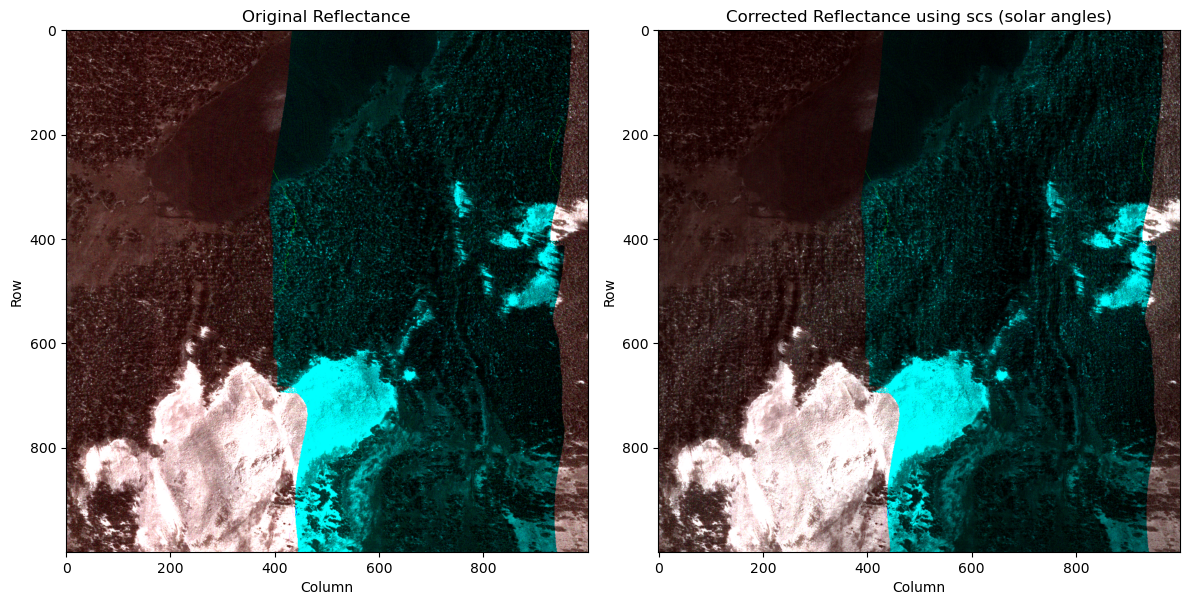

In [39]:

# Set the indices for the RGB bands
r_index = 0  # Red band index
g_index = 1  # Green band index
b_index = 2  # Blue band index

# Set the percentiles for contrast enhancement
percentiles = (5, 95)

plot_reflectance(reflectance, corrected_reflectance, r=r_index, g=g_index, b=b_index, percentiles=percentiles)


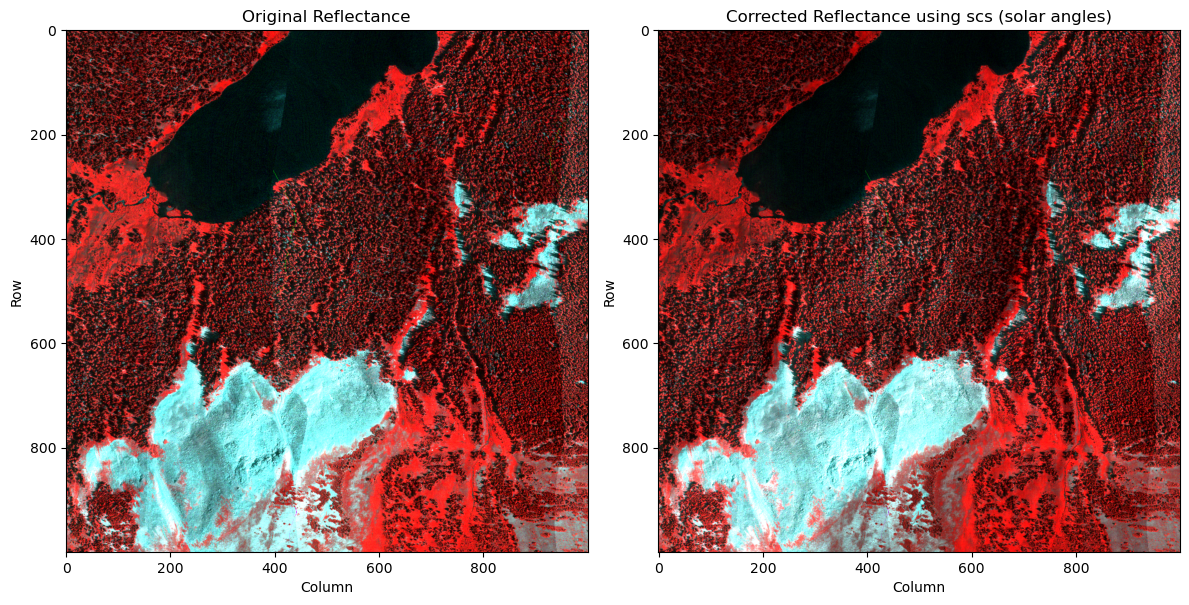

In [40]:
band_index = 93  

plot_reflectance(reflectance, corrected_reflectance, band_index, percentiles=percentiles)


Correlation coefficient: 0.9519654754622954


c:\Users\JANUSHI SHASTRI\anaconda3\envs\cires-demo\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


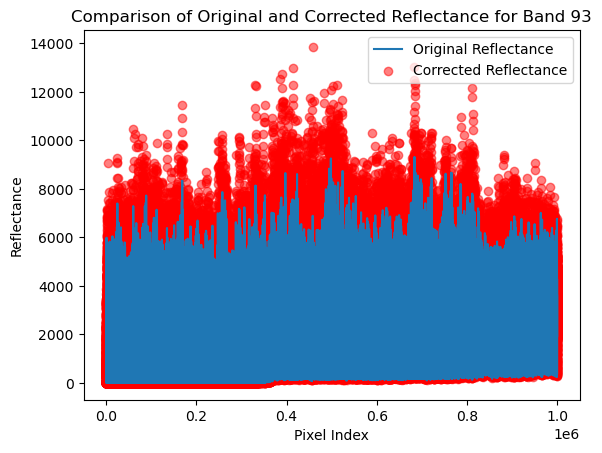

In [41]:

def plot_reflectance_comparison(reflectance, corrected_reflectance, band_index):
    """
        Plots a comparison between the original and Sun Canopy Sensor (SCS) corrected reflectance for a specific band.
        
        - reflectance: A 3D numpy array of the original reflectance data.
        - corrected_reflectance: A 3D numpy array of the SCS-corrected reflectance data.
        - band_index: The index of the spectral band to be compared.

        The function performs the following steps:
        1. Extracts the reflectance values for the specified band from both the original and corrected datasets.
        2. Flattens these values into 1D arrays for plotting.
        3. Creates a plot showing both the original and corrected reflectance values for the specified band.
        4. Uses a line plot for the original reflectance and a scatter plot for the corrected reflectance for visual distinction.
        5. Adds labels, title, and legend to the plot for clarity.
        6. Calculates and prints the correlation coefficient between the original and corrected reflectance values.
        
        This comparison is useful for analyzing the effect of the SCS correction on specific spectral bands and
        quantitatively evaluating the degree of correlation between original and corrected reflectance values.
    """
    reflectance_band = reflectance[:, :, band_index].flatten()
    corrected_reflectance_band = corrected_reflectance[:, :, band_index].flatten()

    fig, ax = plt.subplots()

    ax.plot(reflectance_band, label='Original Reflectance')

    ax.scatter(range(len(corrected_reflectance_band)), corrected_reflectance_band, label='Corrected Reflectance', color='red', alpha=0.5)

    ax.set_xlabel('Pixel Index')
    ax.set_ylabel('Reflectance')
    ax.set_title(f'Comparison of Original and Corrected Reflectance for Band {band_index}')

    ax.legend()

    # Calculate correlation coefficient
    correlation = np.corrcoef(reflectance_band, corrected_reflectance_band)[0, 1]

    print("Correlation coefficient:", correlation)

    plt.show()


band_index = 93  
plot_reflectance_comparison(reflectance, corrected_reflectance, band_index)


### Function to plot aspect, illumination with reflectance and corrected reflectance

In [42]:
def plot_relationship_with_reflectance(parameter, param_name, reflectance, corrected_reflectance, band_index):

    """
        Plots the relationship between a terrain parameter and both original and Sun Canopy Sensor (SCS) corrected reflectance for a specific band.
        
        - parameter: A 2D numpy array of a terrain parameter (e.g., slope, aspect).
        - param_name: String name of the terrain parameter for labeling purposes.
        - reflectance: A 3D numpy array of the original reflectance data.
        - corrected_reflectance: A 3D numpy array of the SCS-corrected reflectance data.
        - band_index: The index of the spectral band to be analyzed.

        The function performs the following steps:
        1. Flattens the parameter array and the reflectance data for the specified band into 1D arrays.
        2. Creates a subplot with two panels for visual comparison.
        3. Plots scatter plots showing the relationship between the parameter values and the original/corrected reflectance values.
        4. Calculates and overlays linear regression lines to illustrate trends.
        5. Computes and displays correlation coefficients for both original and corrected reflectance.
        6. Adds labels, titles, and adjusts layout for clear visualization.

        This plot is useful for assessing how the terrain parameter influences the reflectance values and how this relationship 
        changes after applying the SCS correction, providing insights into the correction's effectiveness.
    """
    
    # Flatten the inputs
    param_flat = parameter.flatten()
    reflectance_band = reflectance[:, :, band_index].flatten()
    corrected_reflectance_band = corrected_reflectance[:, :, band_index].flatten()

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

    # Calculate padding for y-axis
    reflectance_padding = 0.05 * (np.max(reflectance_band) - np.min(reflectance_band))
    corrected_padding = 0.05 * (np.max(corrected_reflectance_band) - np.min(corrected_reflectance_band))

    # Plot parameter vs. original reflectance values as a scatter plot
    ax[0].scatter(param_flat, reflectance_band, alpha=0.3)
    
    # Calculate linear regression for original reflectance
    m_orig, b_orig = np.polyfit(param_flat, reflectance_band, 1)
    sorted_indices = np.argsort(param_flat) 
    ax[0].plot(param_flat[sorted_indices], m_orig*param_flat[sorted_indices] + b_orig, color='black')
    ax[0].text(0.05, 0.95, f'y = {m_orig:.2f}x + {b_orig:.2f}', transform=ax[0].transAxes, fontsize=12, verticalalignment='top')

    ax[0].set_xlabel(param_name)
    ax[0].set_ylabel('Original Reflectance')
    ax[0].set_title(f'{param_name} vs Original Reflectance for Band {band_index}')

    # Set y limits for the plot
    ax[0].set_ylim([np.min(reflectance_band) - reflectance_padding, np.max(reflectance_band) + reflectance_padding])

    # Calculate and print correlation coefficient for original reflectance
    corr_orig = np.corrcoef(param_flat, reflectance_band)[0, 1]
    print(f"Correlation coefficient for original reflectance: {corr_orig}")
    
    # Plot parameter vs. corrected reflectance values as a scatter plot
    ax[1].scatter(param_flat, corrected_reflectance_band, color='red', alpha=0.3)
    
    # Calculate linear regression for corrected reflectance
    m_corr, b_corr = np.polyfit(param_flat, corrected_reflectance_band, 1)
    ax[1].plot(param_flat[sorted_indices], m_corr*param_flat[sorted_indices] + b_corr, color='black')
    ax[1].text(0.05, 0.95, f'y = {m_corr:.2f}x + {b_corr:.2f}', transform=ax[1].transAxes, fontsize=12, verticalalignment='top')

    ax[1].set_xlabel(param_name)
    ax[1].set_ylabel('Corrected Reflectance')
    ax[1].set_title(f'{param_name} vs Corrected Reflectance for Band {band_index}')

    # Set y limits for the plot
    ax[1].set_ylim([np.min(corrected_reflectance_band) - corrected_padding, np.max(corrected_reflectance_band) + corrected_padding])

    # Calculate and print correlation coefficient for corrected reflectance
    corr_corr = np.corrcoef(param_flat, corrected_reflectance_band)[0, 1]
    print(f"Correlation coefficient for corrected reflectance: {corr_corr}")

    # Show the plots
    plt.tight_layout()
    plt.show()


band_index = 93  # Band index to compare




Correlation coefficient for original reflectance: -0.10819792253355226
Correlation coefficient for corrected reflectance: 0.06874580846015689


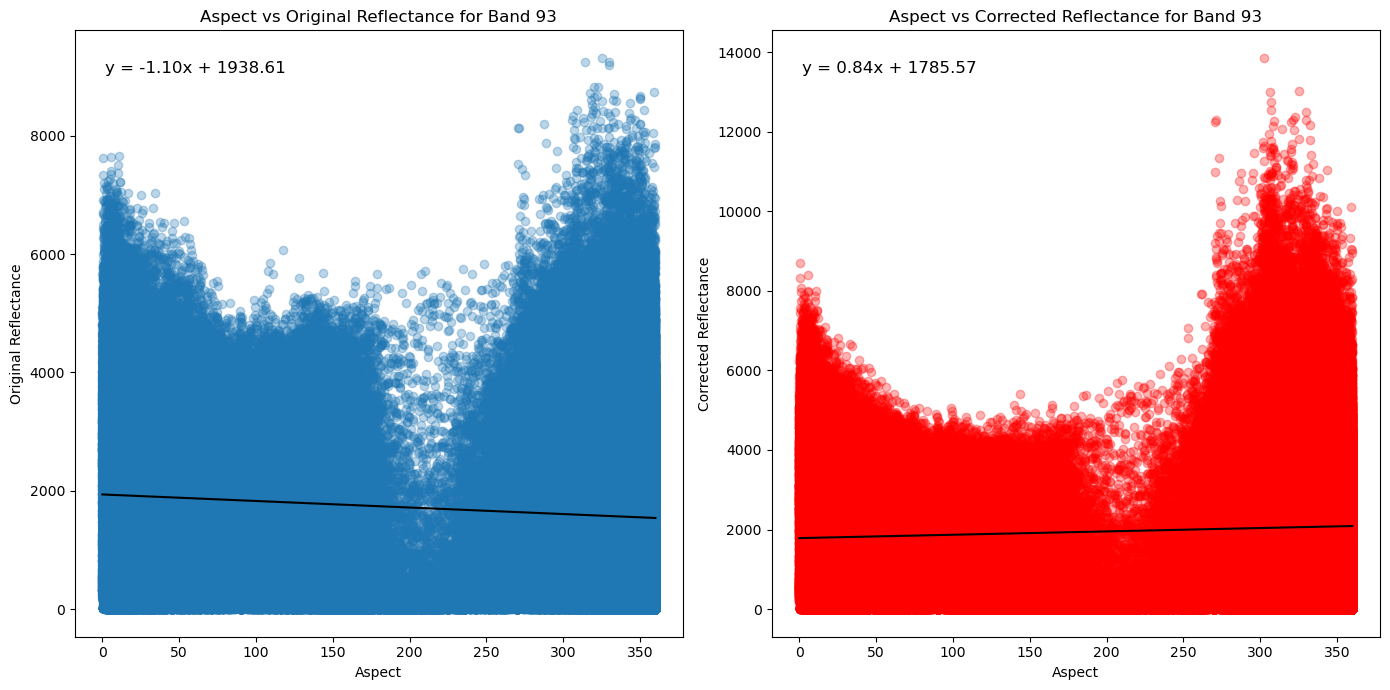

In [43]:
plot_relationship_with_reflectance(aspect, 'Aspect', reflectance, corrected_reflectance, band_index)

C:\Users\JANUSHI SHASTRI\AppData\Local\Temp\ipykernel_31620\2947291777.py:17: RankWarning: Polyfit may be poorly conditioned
  m_orig, b_orig = np.polyfit(param_flat, reflectance_band, 1)
C:\Users\JANUSHI SHASTRI\AppData\Local\Temp\ipykernel_31620\2947291777.py:37: RankWarning: Polyfit may be poorly conditioned
  m_corr, b_corr = np.polyfit(param_flat, corrected_reflectance_band, 1)


Correlation coefficient for original reflectance: -0.03798448806748191
Correlation coefficient for corrected reflectance: -0.2853593376465499


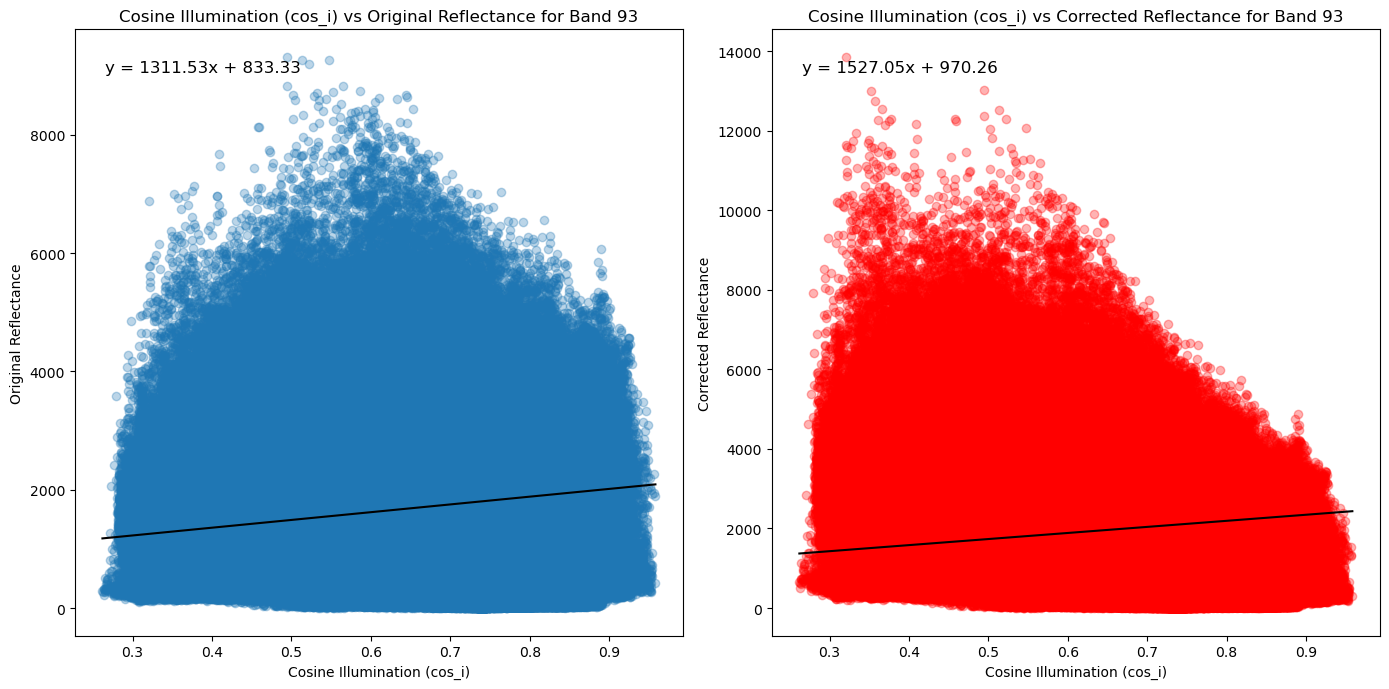

In [44]:
plot_relationship_with_reflectance(cos_i, 'Cosine Illumination (cos_i)', reflectance, corrected_reflectance, band_index)


### statistical analysis on the pixel values before and after correction

In [15]:
# Calculating statistics for the original image
mean_original = np.mean(reflectance)
median_original = np.median(reflectance)
std_dev_original = np.std(reflectance)

# Calculating statistics for the corrected image
mean_corrected = np.mean(corrected_reflectance)
median_corrected = np.median(corrected_reflectance)
std_dev_corrected = np.std(corrected_reflectance)

# Printing the results
print("Original Image Statistics:")
print(f"Mean: {mean_original}, Median: {median_original}, Standard Deviation: {std_dev_original}")

print("\nCorrected Image Statistics:")
print(f"Mean: {mean_corrected}, Median: {median_corrected}, Standard Deviation: {std_dev_corrected}")

Original Image Statistics:
Mean: 999.6667883309859, Median: 455.0, Standard Deviation: 1197.1102940859582

Corrected Image Statistics:
Mean: 1228.0033129483568, Median: 525.0, Standard Deviation: 1543.6236059597538


### Corelation Analysis

In [16]:

from scipy.stats import pearsonr
correlation_coeffs = np.zeros(reflectance.shape[-1])

# Calculating the correlation for each band
for i in range(reflectance.shape[-1]):
    original_band_flat = reflectance[..., i].flatten()
    corrected_band_flat = corrected_reflectance[..., i].flatten()
    correlation, _ = pearsonr(original_band_flat, corrected_band_flat)
    correlation_coeffs[i] = correlation

print(correlation_coeffs)

[0.97626125 0.9620065  0.96378965 0.9650045  0.96698456 0.96775325
 0.96794759 0.96849282 0.96872286 0.96894363 0.96901298 0.96954844
 0.96997936 0.97044728 0.97099332 0.9713846  0.97178622 0.97213257
 0.97242129 0.97267937 0.97294915 0.97320206 0.97340669 0.97344143
 0.97323546 0.97290358 0.97226267 0.97126382 0.97011234 0.96887031
 0.96783583 0.96712668 0.96664389 0.96634551 0.96615248 0.96624902
 0.96669922 0.96739313 0.96817019 0.96888392 0.96942815 0.96984611
 0.97015561 0.97031124 0.97042318 0.97063145 0.9709083  0.97115398
 0.97130386 0.97128772 0.9712718  0.97138481 0.9716307  0.97195853
 0.97217313 0.97238122 0.97271603 0.97294536 0.97275886 0.9730804
 0.97284631 0.9717701  0.96995833 0.96707897 0.96330996 0.95958303
 0.95636977 0.9540249  0.95219919 0.95126262 0.95103728 0.95119543
 0.951496   0.95177429 0.95202386 0.95229043 0.95207517 0.95225485
 0.95216758 0.9521238  0.95207237 0.95203104 0.95195982 0.9519312
 0.95186524 0.95188574 0.95183148 0.95169082 0.95174238 0.951855

### NDVI

In [45]:

# Define the wavelength ranges for the red and NIR bands
red_band_range = (600, 700)
nir_band_range = (700, 1300)

red_band_indices = []
nir_band_indices = []
red_band_wavelengths = []
nir_band_wavelengths = []

for i, wavelength in enumerate(wavelengths):
    if red_band_range[0] <= wavelength <= red_band_range[1]:
        red_band_indices.append(i)
        red_band_wavelengths.append(wavelength)

    if nir_band_range[0] <= wavelength <= nir_band_range[1]:
        nir_band_indices.append(i)
        nir_band_wavelengths.append(wavelength)

print("Red Band Indices:", red_band_indices)
print("Red Band Wavelengths:", red_band_wavelengths)


print("NIR Band Indices:", nir_band_indices)
print("NIR Band Wavelengths:", nir_band_wavelengths)


Red Band Indices: [44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]
Red Band Wavelengths: [601.828, 606.8383, 611.8486, 616.8589, 621.8691, 626.8794, 631.8897, 636.9, 641.9103, 646.9205, 651.9308, 656.9411, 661.9514, 666.9616, 671.9719, 676.9822, 681.9925, 687.0028, 692.013, 697.0233]
NIR Band Indices: [64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183]
NIR Band Wavelengths: [702.0336, 707.0439, 712.0542, 717.0644, 722.0747, 727.085, 732.0953, 737.1055

In [46]:
def calculate_ndvi(ref, red_band_index, nir_band_index):
    # Extract the red and NIR bands
    red_band = ref[:, :, red_band_index]
    nir_band = ref[:, :, nir_band_index]

     # Calculate NDVI
    ndvi = (nir_band - red_band) / (nir_band + red_band)
    #replacing bands other than threshold to nan
    ndvi = np.where(ndvi >= 0.5, ndvi, np.nan)
    return ndvi

In [47]:
red_band_index = 56
nir_band_index = 86

ndvi_corrected_reflectance= calculate_ndvi(corrected_reflectance, red_band_index, nir_band_index)


In [48]:
ndvi_corrected_reflectance

array([[0.72413793, 0.66666667, 0.62691131, ..., 0.74904943, 0.7295082 ,
        0.78740157],
       [       nan,        nan,        nan, ..., 0.78202995, 0.68068966,
        0.68469443],
       [0.63196635, 0.59026889,        nan, ..., 0.77462289, 0.76490925,
        0.66691786],
       ...,
       [0.63607011, 0.57675753, 0.56356551, ..., 0.76544276, 0.57218479,
               nan],
       [0.70332356, 0.69311663, 0.68876218, ..., 0.69445305, 0.60683761,
               nan],
       [0.78964578, 0.7576276 , 0.71209213, ..., 0.78133478, 0.78521825,
        0.6969414 ]])

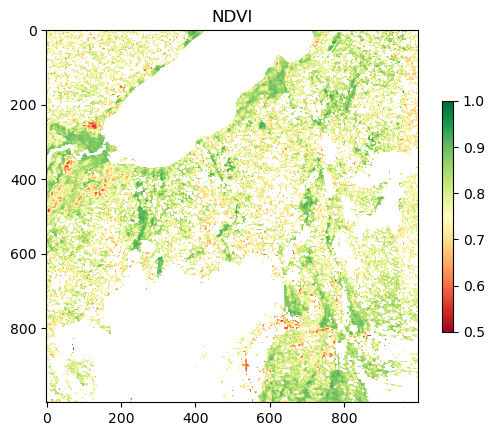

In [49]:
# Plot NDVI
plt.figure(figsize=(6, 6))
plt.imshow(ndvi_corrected_reflectance, cmap='RdYlGn')
plt.colorbar(shrink=0.5)
plt.title('NDVI')
plt.show()

In [50]:
red_band_index = 56
nir_band_index = 86

ndvi_reflectance= calculate_ndvi(reflectance, red_band_index, nir_band_index)

In [51]:
ndvi_reflectance

array([[0.72374361, 0.66451613, 0.62765957, ..., 0.74863388, 0.72948602,
        0.78685386],
       [       nan,        nan,        nan, ..., 0.78088077, 0.6803653 ,
        0.68432203],
       [0.63091787, 0.58926488,        nan, ..., 0.77319588, 0.76349024,
        0.66683193],
       ...,
       [0.63612288, 0.57645765, 0.56347187, ..., 0.76537846, 0.57197452,
               nan],
       [0.70330903, 0.69277274, 0.68882759, ..., 0.69432601, 0.60680011,
               nan],
       [0.78924328, 0.75737705, 0.71173848, ..., 0.78109739, 0.78513265,
        0.69683482]])

In [52]:
def plot_ndvi_comparison(ndvi, corrected_ndvi):
    ndvi_flat = ndvi.flatten()
    corrected_ndvi_flat = corrected_ndvi.flatten()

    fig, ax = plt.subplots()

    ax.plot(ndvi_flat, label='Original NDVI')

    ax.scatter(range(len(corrected_ndvi_flat)), corrected_ndvi_flat, label='Corrected NDVI', color='red', alpha=0.5)

    ax.set_xlabel('Pixel Index')
    ax.set_ylabel('NDVI')
    ax.set_title('Comparison of Original and Corrected NDVI')

    ax.legend()

    mask = np.isfinite(ndvi_flat) & np.isfinite(corrected_ndvi_flat)
    correlation = np.corrcoef(ndvi_flat[mask], corrected_ndvi_flat[mask])[0, 1]

    print("Correlation coefficient:", correlation)

    plt.show()

Correlation coefficient: 0.9999399843970374


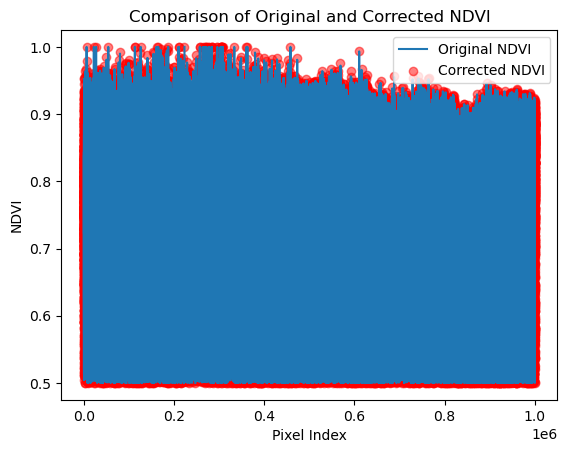

In [53]:
plot_ndvi_comparison(ndvi_reflectance, ndvi_corrected_reflectance)


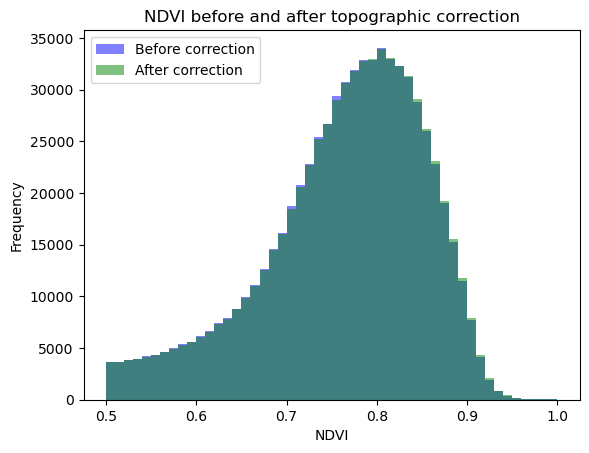

In [54]:


def plot_ndvi_histograms(ndvi_before, ndvi_after):
    # Create a mask for finite (non-NaN) values
    mask_before = np.isfinite(ndvi_before)
    mask_after = np.isfinite(ndvi_after)

    # Flatten the arrays and apply the masks
    ndvi_before_flat = ndvi_before.flatten()[mask_before.flatten()]
    ndvi_after_flat = ndvi_after.flatten()[mask_after.flatten()]

    # Create a figure and axes
    fig, ax = plt.subplots()

    # Plot histograms
    ax.hist(ndvi_before_flat, bins=50, alpha=0.5, label='Before correction', color='blue')
    ax.hist(ndvi_after_flat, bins=50, alpha=0.5, label='After correction', color='green')

    # Set labels and title
    ax.set_xlabel('NDVI')
    ax.set_ylabel('Frequency')
    ax.set_title('NDVI before and after topographic correction')
    ax.legend()

    # Show the plot
    plt.show()

# Use your NDVI data to create the histograms
plot_ndvi_histograms(ndvi_reflectance, ndvi_corrected_reflectance)


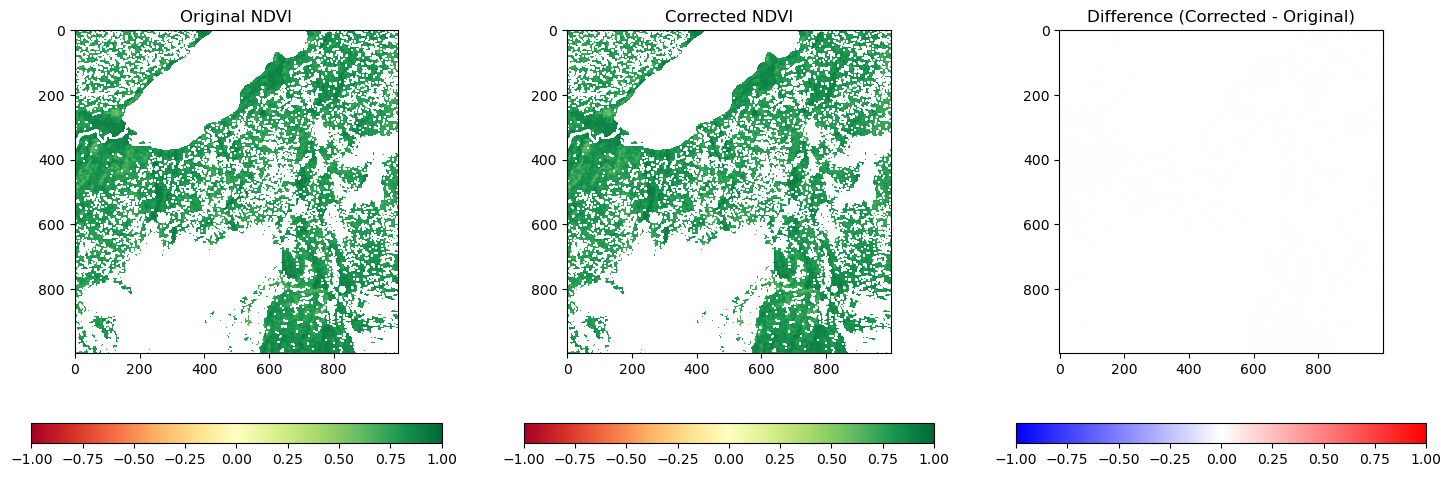

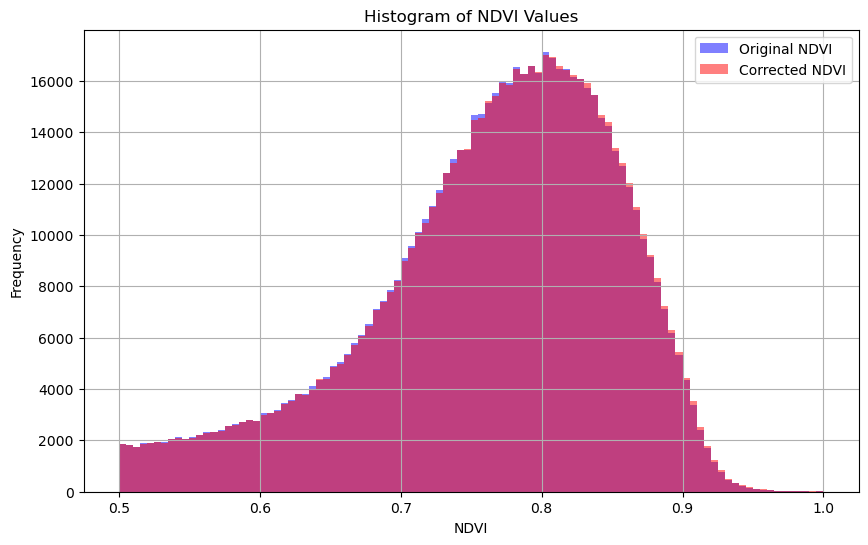

In [27]:


# Compute the difference between the corrected and original NDVI
ndvi_diff = ndvi_corrected_reflectance - ndvi_reflectance

# Plot the original NDVI, corrected NDVI, and difference map side by side
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

im1 = axs[0].imshow(ndvi_reflectance, cmap='RdYlGn', vmin=-1, vmax=1)
axs[0].set_title('Original NDVI')
fig.colorbar(im1, ax=axs[0], orientation='horizontal')

im2 = axs[1].imshow(ndvi_corrected_reflectance, cmap='RdYlGn', vmin=-1, vmax=1)
axs[1].set_title('Corrected NDVI')
fig.colorbar(im2, ax=axs[1], orientation='horizontal')

im3 = axs[2].imshow(ndvi_diff, cmap='bwr', vmin=-1, vmax=1)
axs[2].set_title('Difference (Corrected - Original)')
fig.colorbar(im3, ax=axs[2], orientation='horizontal')

plt.show()

# Plot the histogram of NDVI values before and after correction
plt.figure(figsize=(10, 6))
plt.hist(ndvi_reflectance.flatten(), bins=100, color='blue', alpha=0.5, label='Original NDVI')
plt.hist(ndvi_corrected_reflectance.flatten(), bins=100, color='red', alpha=0.5, label='Corrected NDVI')
plt.title('Histogram of NDVI Values')
plt.xlabel('NDVI')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [56]:
def plot_correlation_2(x, y1, y2, x_label, y1_label, y2_label, title):
    # Create masks for finite (non-NaN) values
    mask_y1 = np.isfinite(x) & np.isfinite(y1)
    mask_y2 = np.isfinite(x) & np.isfinite(y2)

    # Apply the masks and flatten the arrays for plotting
    x_flat_y1 = x.flatten()[mask_y1.flatten()]
    y1_flat = y1.flatten()[mask_y1.flatten()]
    x_flat_y2 = x.flatten()[mask_y2.flatten()]
    y2_flat = y2.flatten()[mask_y2.flatten()]

    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    axs[0].scatter(x_flat_y1, y1_flat, s=1, color="#0D52BD", alpha=0.5)
    m1, b1 = np.polyfit(x_flat_y1, y1_flat, 1)
    axs[0].plot(x_flat_y1, m1*x_flat_y1 + b1, color='red', linewidth=2)
    axs[0].text(0.05, 0.95, f'y = {m1:.2f}x + {b1:.2f}', transform=axs[0].transAxes, fontsize=12,
            verticalalignment='top')
    axs[0].set_title(f'Correlation between {x_label} and {y1_label}')
    axs[0].set_xlabel(x_label)
    axs[0].set_ylabel(y1_label)

    axs[1].scatter(x_flat_y2, y2_flat, s=1, color="#0D52BD", alpha=0.5)
    m2, b2 = np.polyfit(x_flat_y2, y2_flat, 1)
    axs[1].plot(x_flat_y2, m2*x_flat_y2 + b2, color='red', linewidth=2)
    axs[1].text(0.05, 0.95, f'y = {m2:.2f}x + {b2:.2f}', transform=axs[1].transAxes, fontsize=12,
            verticalalignment='top')
    axs[1].set_title(f'Correlation between {x_label} and {y2_label}')
    axs[1].set_xlabel(x_label)
    axs[1].set_ylabel(y2_label)

    plt.tight_layout()
    plt.show()


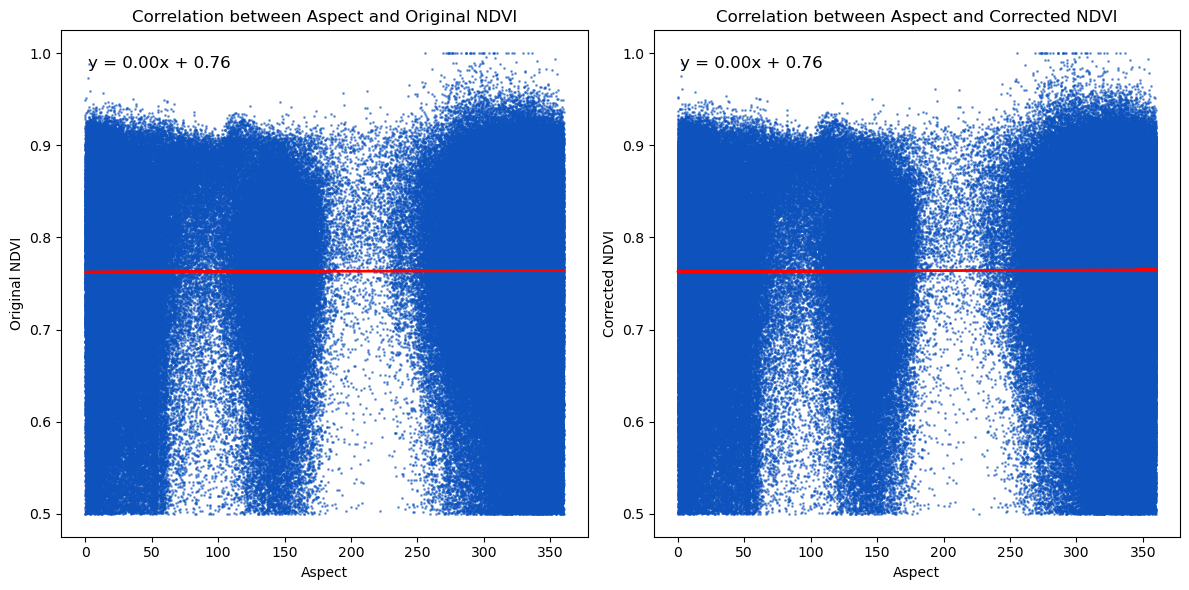

In [57]:
plot_correlation_2(aspect, ndvi_reflectance, ndvi_corrected_reflectance, 'Aspect', 'Original NDVI', 'Corrected NDVI', 'Correlation between Aspect and NDVI')


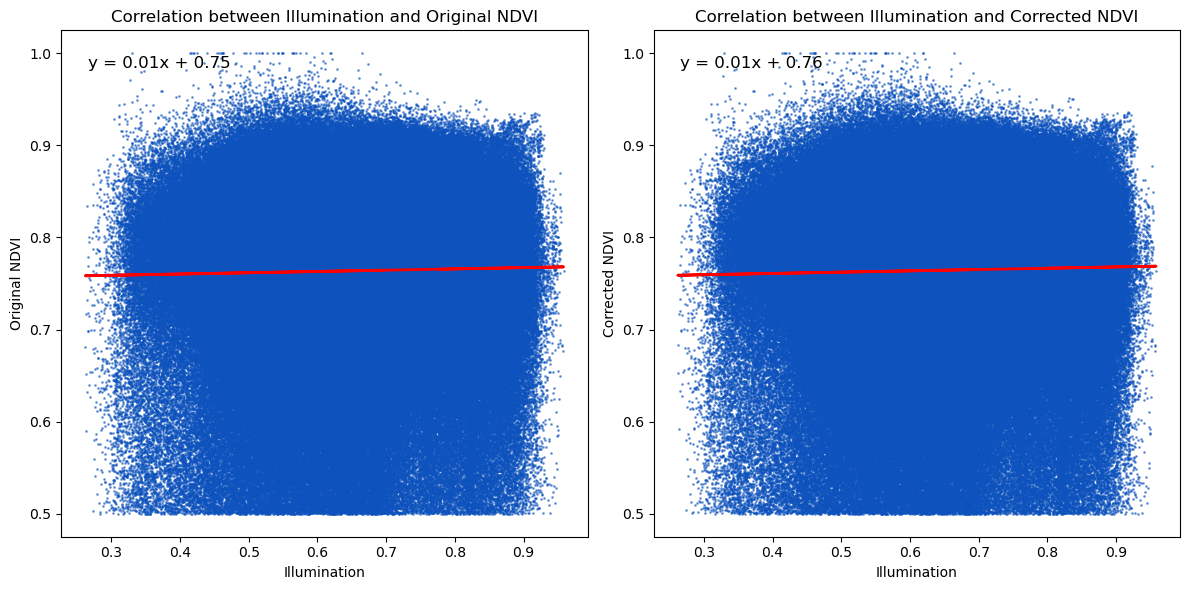

In [58]:
plot_correlation_2(cos_i, ndvi_reflectance, ndvi_corrected_reflectance, 'Illumination', 'Original NDVI', 'Corrected NDVI', 'Correlation between Illumination and NDVI')
